In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
df = df.drop(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis=1)

In [6]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64


In [8]:
df.shape

(920, 8)

In [9]:
df = df.drop(['ca'], axis=1)

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

id           0
age          0
trestbps    59
chol        30
thalch      55
oldpeak     62
num          0
dtype: int64


In [11]:
df_cleaned = df.dropna()

In [12]:
df_cleaned.shape

(827, 7)

In [13]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
num         0
dtype: int64


In [14]:
x = df_cleaned.drop("num", axis=1)
y = df_cleaned["num"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train

,id,age,trestbps,chol,thalch,oldpeak
551,552,57,150.0,255.0,92.0,3.0
622,623,50,160.0,0.0,110.0,0.0
409,410,49,140.0,187.0,172.0,0.0
904,905,57,130.0,207.0,96.0,1.0
760,761,61,120.0,0.0,80.0,0.0
...,...,...,...,...,...,...
71,72,67,125.0,254.0,163.0,0.2
106,107,59,140.0,177.0,162.0,0.0
270,271,61,140.0,207.0,138.0,1.9
451,452,54,110.0,208.0,142.0,0.0


In [17]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = clf.predict(x_test)

In [19]:
y_pred

array([2, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 3, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 3,
       2, 0, 1, 0, 1, 0, 2, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 0, 2, 3, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 3,
       0, 0, 2, 2, 0, 3, 3, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       3, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2])

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  6,  5,  2,  0],
       [12, 24,  5,  2,  0],
       [ 4,  7,  6,  3,  0],
       [ 5,  5,  4,  7,  0],
       [ 2,  1,  1,  1,  0]])

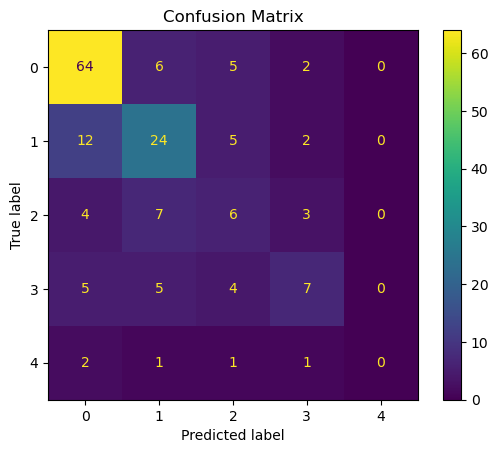

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.56      0.56      0.56        43
           2       0.29      0.30      0.29        20
           3       0.47      0.33      0.39        21
           4       0.00      0.00      0.00         5

    accuracy                           0.61       166
   macro avg       0.41      0.40      0.40       166
weighted avg       0.58      0.61      0.59       166



c:\Users\G M RIFAT REZA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\G M RIFAT REZA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\G M RIFAT REZA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
